In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
!pip install pmdarima

In [7]:
uri = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'
dados = pd.read_csv(uri, sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=16, engine='python')
# dados.to_csv('../dados/tuberculose_ano_mes_diagnostico.csv', index_label = False)
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [8]:
dados.drop('Total', axis = 1, inplace=True)
dados.drop(19, inplace=True)


In [9]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [10]:
dados_st = dados.melt(id_vars='Ano Diagnóstico', value_name='casos', var_name='Mês')
dados_st

,Ano Diagnóstico,Mês,casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [11]:
a_converter_mes = dict(zip(dados_st['Mês'].unique(),np.arange(1,13)))
a_converter_mes['Jan']

1

In [12]:
dados_st['data'] = dados_st['Ano Diagnóstico'] + '-' + (dados_st['Mês'].map(a_converter_mes).apply(str))
dados_st.data = pd.to_datetime(dados_st.data)
dados_st = dados_st[['data', 'casos']]
dados_st

,data,casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


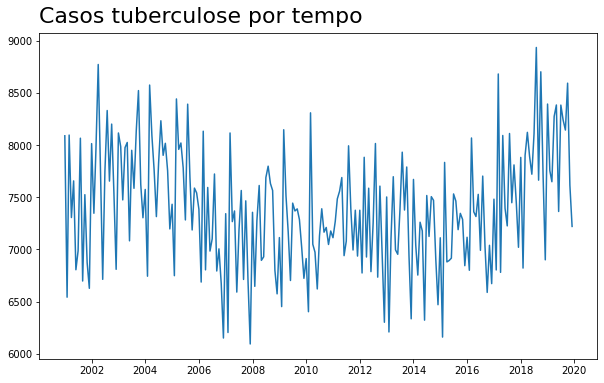

In [13]:
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax.figure.set_size_inches(10,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


## Medias móveis

In [14]:
dados_st.sort_values(by='data', inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


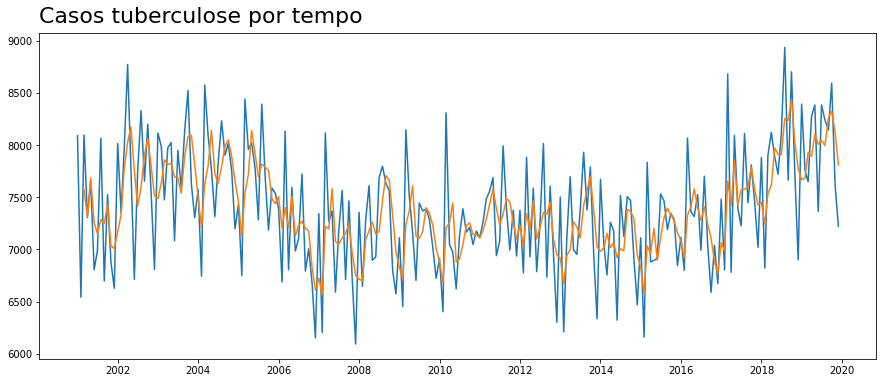

In [15]:
dados_st['media_movel_3'] = dados_st['casos'].rolling(3).mean()
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax = sns.lineplot(x = 'data', y = 'media_movel_3', data = dados_st)
ax.figure.set_size_inches(15,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


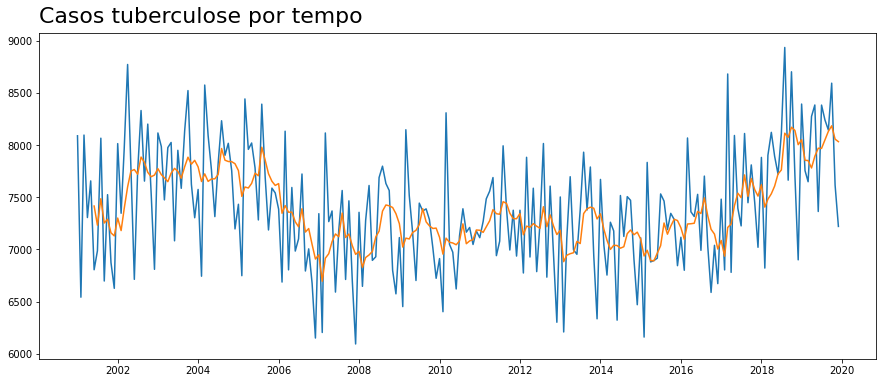

In [16]:
dados_st['media_movel_6'] = dados_st['casos'].rolling(6).mean()
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax = sns.lineplot(x = 'data', y = 'media_movel_6', data = dados_st)
ax.figure.set_size_inches(15,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


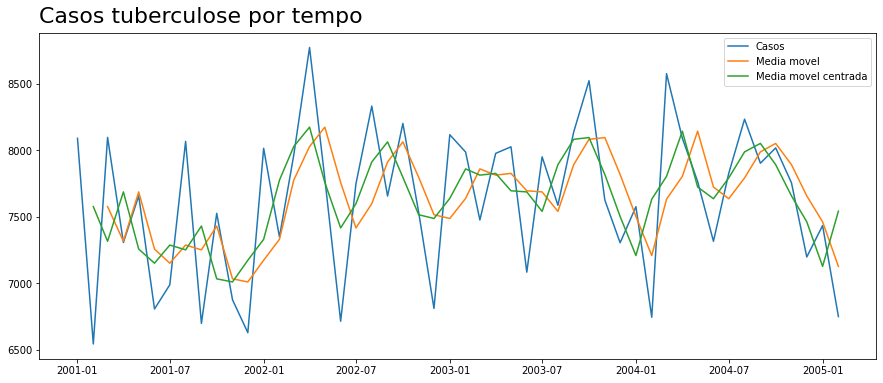

In [17]:
dados_st['media_movel_3c'] = dados_st['casos'].rolling(3, center=True).mean()
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st[:50], label = 'Casos')
ax = sns.lineplot(x = 'data', y = 'media_movel_3', data = dados_st[:50], label = 'Media movel')
ax = sns.lineplot(x = 'data', y = 'media_movel_3c', data = dados_st[:50], label = 'Media movel centrada')
ax.figure.set_size_inches(15,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;


## Tentando encontrar padroes

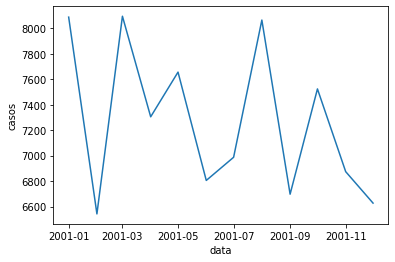

In [18]:
sns.lineplot(x = 'data', y = 'casos', data = dados_st[:12])

In [19]:
dados_st['ano'] = dados_st['data'].dt.year
dados_st['mes'] = dados_st['data'].dt.month

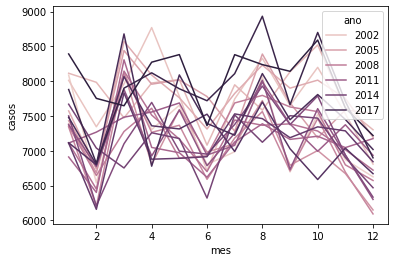

In [20]:
# Muito ruim, não da para analisar
sns.lineplot(x = 'mes', y = 'casos', data = dados_st, hue = 'ano')


In [21]:
decomposicao = seasonal_decompose(dados_st[['data', 'casos']].set_index('data'))

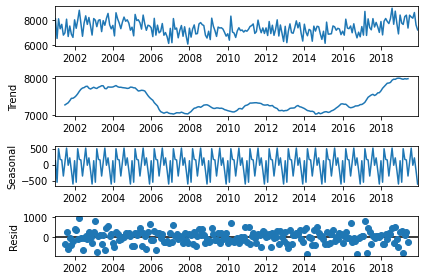

In [22]:
decomposicao.plot();

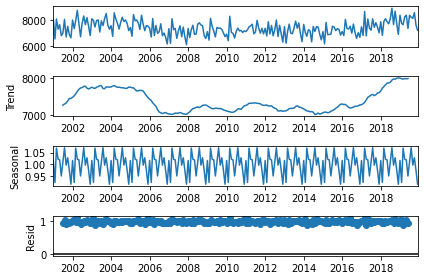

In [23]:
decomposicao = seasonal_decompose(dados_st[['data', 'casos']].set_index('data'), model = 'multiplicative')
decomposicao.plot();

### outro exemplo

In [24]:
uri_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'
dados_passageiros = pd.read_csv(uri_passageiros)

In [25]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [27]:
dados_passageiros.Month = pd.to_datetime(dados_passageiros.Month)

In [28]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


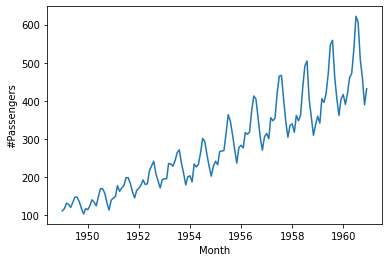

In [29]:
sns.lineplot(x = 'Month', y = '#Passengers', data = dados_passageiros)

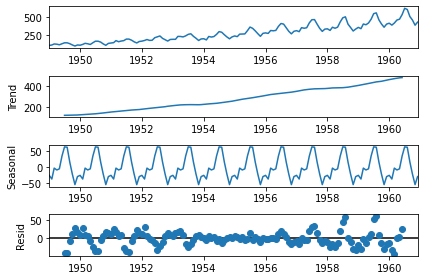

In [30]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'))
decomposicao_p.plot();

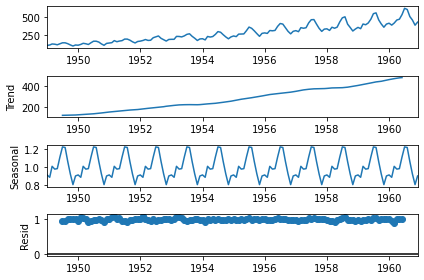

In [31]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')
pao = decomposicao_p.plot();

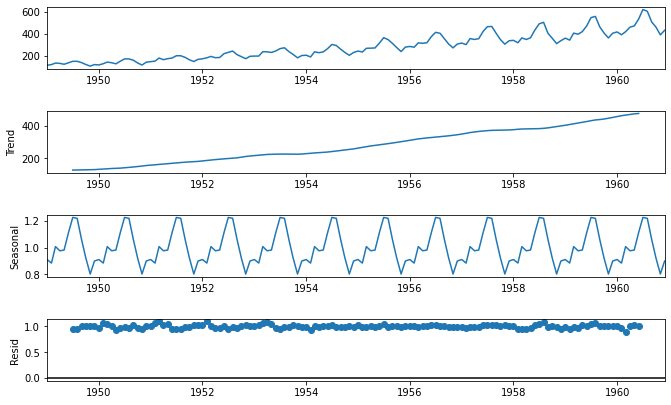

In [32]:
pao.set_size_inches(10, 6)
pao

## Autocorrelação

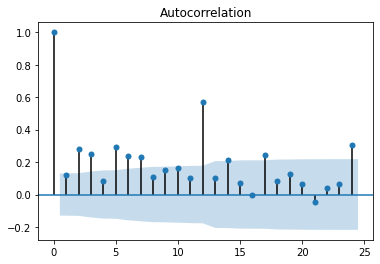

In [33]:
plot_acf(dados_st['casos']);

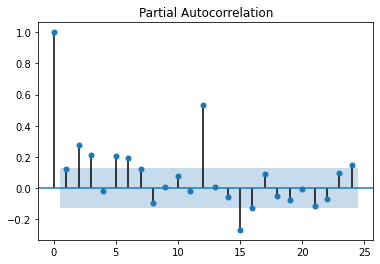

In [34]:
plot_pacf(dados_st['casos']);

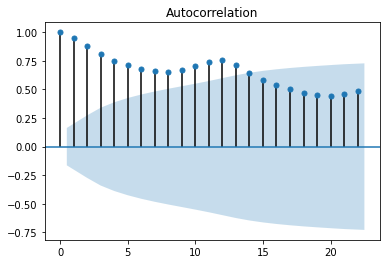

In [35]:
plot_acf(dados_passageiros['#Passengers']);

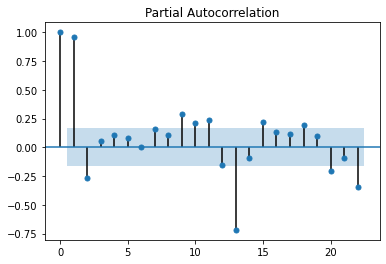

In [36]:
plot_pacf(dados_passageiros['#Passengers']);

# Parte 05

In [37]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [38]:
dados_passageiros.rename({'Month' : 'data', '#Passengers' : 'passageiros'}, axis = 1, inplace=True)

In [39]:
dados_passageiros['mes'] = dados_passageiros.data.dt.month
dados_passageiros.head()

,data,passageiros,mes
0,1949-01-01,112,1
1,1949-02-01,118,2
2,1949-03-01,132,3
3,1949-04-01,129,4
4,1949-05-01,121,5


In [40]:
dados_passageiros['ano'] = dados_passageiros.data.dt.year
dados_passageiros.head()

,data,passageiros,mes,ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


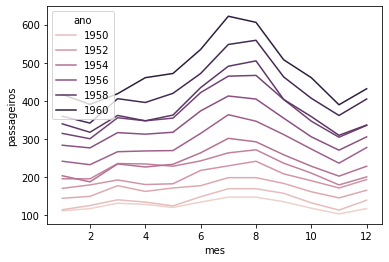

In [41]:
sns.lineplot(x = 'mes', y = 'passageiros', data = dados_passageiros, hue = 'ano')

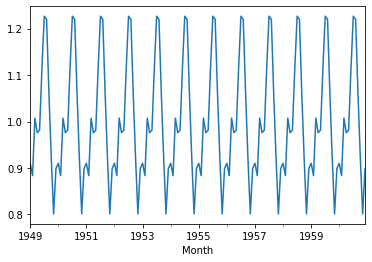

In [42]:
decomposicao_p.seasonal.plot()

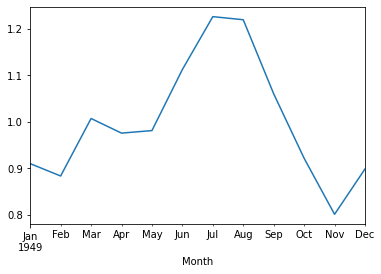

In [43]:
# Sasonalidade dos dados de passageiros

decomposicao_p.seasonal[:12].plot()

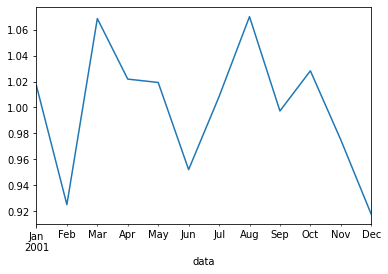

In [44]:
# Sasonalidade tuberculose

decomposicao.seasonal[:12].plot()

## Previsão ARIMA

In [45]:
from statsmodels.tsa.arima_model import ARIMA

dados_treino = dados_st.query('ano != 2019')
dados_teste = dados_st.query('ano == 2019')



modelo_arima = ARIMA(dados_treino.casos.values.astype('float32'), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [46]:
modelo_arima_treinado.forecast(12)

# Forecast retorna o valor previsto, residuo e o intervalo de confiança

(array([7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
        7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
        7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559]),
 array([554.13959834, 554.13959834, 554.13959834, 554.13959834,
        554.13959834, 554.13959834, 554.13959834, 554.13959834,
        554.13959834, 554.13959834, 554.13959834, 554.13959834]),
 array([[6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073]]))

In [47]:
previsao, _, _ =modelo_arima_treinado.forecast(12)


In [48]:
dados_teste['previsao'] = previsao

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


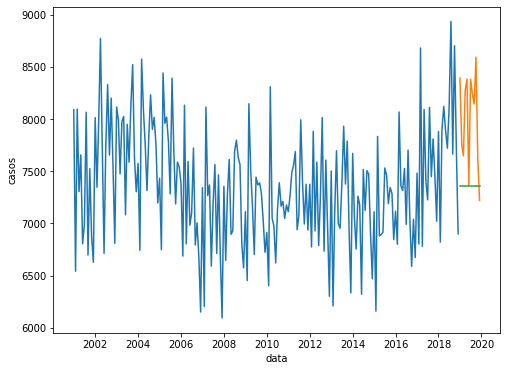

In [49]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

**O modelo está fazendo a média dos dados como previsão, péssimo modelo. O hiper parametro 'order' deve ser analisado**

## Ajustando parametros

In [50]:
from statsmodels.tsa.arima_model import ARIMA

dados_treino = dados_st.query('ano != 2019')
dados_teste = dados_st.query('ano == 2019')



modelo_arima = ARIMA(dados_treino.casos.values.astype('float32'), order = [12,1,2])
modelo_arima_treinado = modelo_arima.fit()

previsao, _, _ =modelo_arima_treinado.forecast(12)

dados_teste['previsao'] = previsao

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

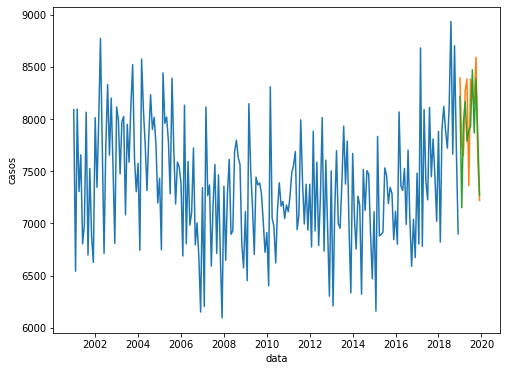

In [51]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

## Aplicação modelo ARIMA à passageiros

In [52]:
from statsmodels.tsa.arima_model import ARIMA

dados_treino_passageiros = dados_passageiros.query('ano != 1960')
dados_teste_passageiros = dados_passageiros.query('ano == 1960')



modelo_arima = ARIMA(dados_treino_passageiros.passageiros.values.astype('float32'), order = [2,1,2])
modelo_arima_treinado = modelo_arima.fit()

previsao, _, _ =modelo_arima_treinado.forecast(12)

dados_teste_passageiros['previsao'] = previsao

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

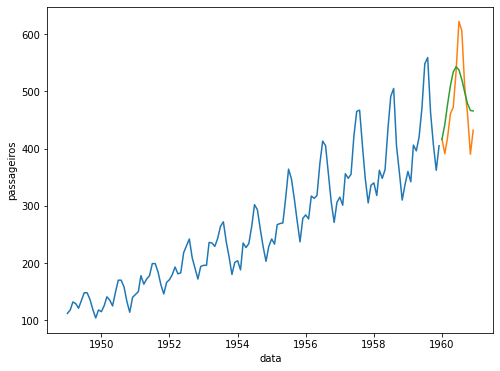

In [53]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'data', y = 'passageiros', data = dados_treino_passageiros)
sns.lineplot(x = 'data', y = 'passageiros', data = dados_teste_passageiros)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste_passageiros)

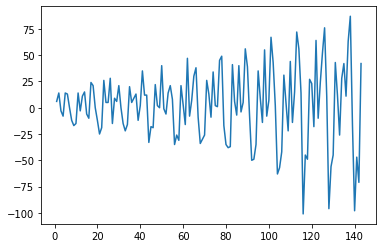

In [54]:
dados_passageiros.passageiros.diff().plot()

# Parte 06

## Modelo Auto Arima

In [55]:
from pmdarima.arima import auto_arima

In [56]:
modelo_autoarima = auto_arima(
    dados_treino.casos.values, error_action='ignore', trace=True,
    seasonal=True, m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.90 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.21 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.41 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.99 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

In [57]:
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste['previsao_autoarima'] = previsao_autoarima

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


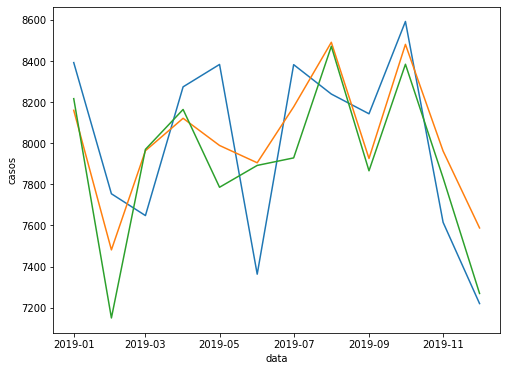

In [58]:
plt.figure(figsize=(8,6))
# sns.lineplot(x = 'data', y = 'casos', data = dados_treino)
sns.lineplot(x = 'data', y = 'casos', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao_autoarima', data = dados_teste)
sns.lineplot(x = 'data', y = 'previsao', data = dados_teste)

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
resultado_autoarima = mean_squared_error(dados_teste.casos, dados_teste.previsao_autoarima)
resultado_arima = mean_squared_error(dados_teste.casos, dados_teste.previsao)

print(f'Autoarima = {resultado_autoarima}')
print(f'Arima = {resultado_arima}')


Autoarima = 93378.93285752926
Arima = 131384.4418748081


## FBPROPHET 

### dados tuberculose

In [75]:
from fbprophet import Prophet

modelo_profeta = Prophet()
a_reanomear = {'data' : 'ds', 'casos' : 'y'}
dados_treino_profeta = dados_treino.rename(a_reanomear, axis = 1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_profeta[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
futuro = modelo_profeta_treinado.make_future_dataframe(12, freq='M')

In [77]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-01-01,7677.431620,7379.190726,8294.560987,7677.431620,7677.431620,0.021426,0.021426,0.021426,0.021426,0.021426,0.021426,0.0,0.0,0.0,7841.925017
1,2001-02-01,7674.773971,6428.640525,7379.095075,7674.773971,7674.773971,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,0.0,0.0,0.0,6907.458238
2,2001-03-01,7672.373514,7782.101745,8707.226512,7672.373514,7672.373514,0.075545,0.075545,0.075545,0.075545,0.075545,0.075545,0.0,0.0,0.0,8251.985125
3,2001-04-01,7669.715865,7323.655259,8261.586467,7669.715865,7669.715865,0.014073,0.014073,0.014073,0.014073,0.014073,0.014073,0.0,0.0,0.0,7777.648893
4,2001-05-01,7667.143946,7324.081133,8220.724588,7667.143946,7667.143946,0.012142,0.012142,0.012142,0.012142,0.012142,0.012142,0.0,0.0,0.0,7760.241704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7843.214052,7577.820022,8441.832654,7836.897016,7847.696038,0.018249,0.018249,0.018249,0.018249,0.018249,0.018249,0.0,0.0,0.0,7986.347122
224,2019-08-31,7855.461529,7417.095942,8327.713791,7847.649079,7861.351834,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.0,0.0,0.0,7859.591875
225,2019-09-30,7867.313926,7860.639825,8762.732896,7858.019156,7874.603911,0.055514,0.055514,0.055514,0.055514,0.055514,0.055514,0.0,0.0,0.0,8304.062207
226,2019-10-31,7879.561403,7204.785644,8120.279655,7868.557408,7888.211139,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,0.0,0.0,0.0,7659.985529


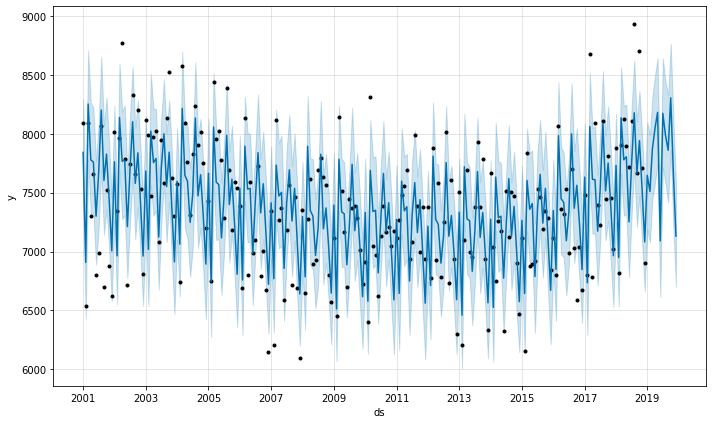

In [78]:
modelo_profeta_treinado.plot(resultado_profeta);

### Passageiros

In [83]:
modelo = Prophet(seasonality_mode='multiplicative')
a_renomear = dict(data = 'ds', passageiros = 'y')
dados_passageiros.rename(a_renomear, axis = 1, inplace=True)
modelo.fit(dados_passageiros)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
futuro = modelo.make_future_dataframe(12, freq='M')
previsao = modelo.predict()

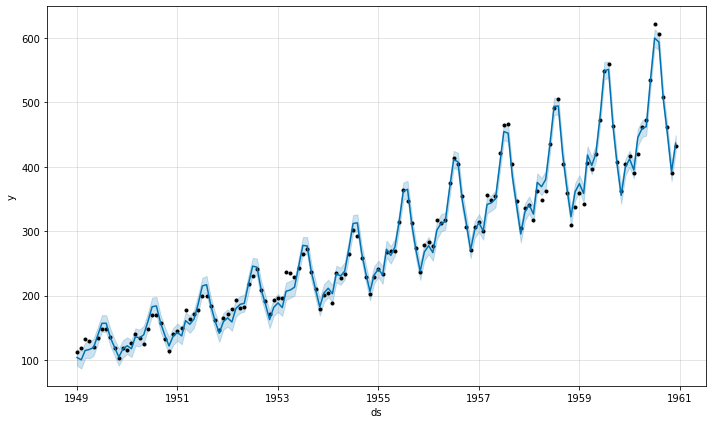

In [101]:
figure = modelo.plot(previsao)
